In [33]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Load the CSV file without header
df = pd.read_csv('network-metrics_innovation.csv', header=None)

# Define the new column names
column_names = ["who", "color", "hierarchy", "polity", "degree", "clustering-coeff", "resources", "innovation"]

# Assign the column names to the dataframe
df.columns = column_names

# Save the updated dataframe back to a CSV file
df.to_csv('Network_metrics_innovation_withHeaders.csv', index=False)


### Loading and Cleaning Data

In [34]:
df

,who,color,hierarchy,polity,degree,clustering-coeff,resources,innovation
0,237,135,12,(turtle 186),16,0.025000,-2.707163e+06,9
1,554,135,11,(turtle 186),21,0.019048,-7.955260e+05,7
2,301,135,7,(turtle 186),9,0.027778,-2.908004e+04,11
3,221,135,4,(turtle 186),18,0.006536,-1.134137e+05,9
4,137,135,10,(turtle 186),13,0.000000,-3.889196e+05,12
...,...,...,...,...,...,...,...,...
995,44,135,6,(turtle 186),16,0.025000,-2.801383e+05,10
996,297,135,7,(turtle 186),13,0.025641,-4.500027e+04,10
997,963,135,5,(turtle 186),8,0.000000,3.362258e+00,17
998,277,135,10,(turtle 186),20,0.015789,-3.161657e+06,9


## C(k) vs K

### Power Law Distribution

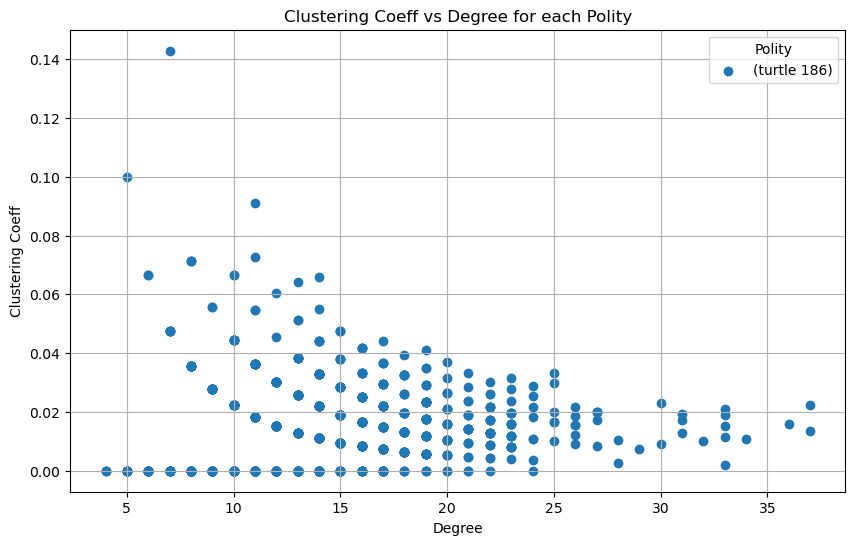

In [35]:
df_sorted = df.sort_values(by="polity")# Sort the data by "polity"

# Group the data by "polity"
groups = df_sorted.groupby("polity")

# Plot "Clustering Coeff" vs "degree" for each polity
plt.figure(figsize=(10, 6))

for name, group in groups:
    plt.scatter(group["degree"], group["clustering-coeff"], label=name)

plt.xlabel("Degree")
plt.ylabel("Clustering Coeff")
plt.title("Clustering Coeff vs Degree for each Polity")
plt.legend(title="Polity")
plt.grid(True)
plt.show()

### Hubs (Tail-end of distribution)

In [36]:
import pandas as pd
import numpy as np

# Assuming df is the DataFrame with columns 'polity', 'degree', and 'clustering-coeff'

# Define a function to identify nodes at the tail of the power-law distribution
def identify_tail_nodes(df, tail_fraction=0.05):
    # Sort the DataFrame by degree in descending order
    df_sorted = df.sort_values(by="degree", ascending=False)
    
    # Calculate the number of nodes in the tail
    tail_count = int(len(df) * tail_fraction)
    
    # Extract the nodes at the tail
    tail_nodes = df_sorted.head(tail_count)
    
    return tail_nodes

# Identify the tail nodes
tail_nodes = identify_tail_nodes(df)

# Display the list of tail nodes
print(tail_nodes)

     who  color  hierarchy        polity  degree  clustering-coeff  \
10   820    135          0  (turtle 186)      37          0.013514   
263  924    135          0  (turtle 186)      37          0.022523   
41   636    135          0  (turtle 186)      36          0.015873   
354  437    135          5  (turtle 186)      34          0.010695   
540  591    135          0  (turtle 186)      33          0.020833   
644  606    135          1  (turtle 186)      33          0.018939   
765  778    135         11  (turtle 186)      33          0.011364   
339  148    135         17  (turtle 186)      33          0.015152   
617  672    135         14  (turtle 186)      33          0.001894   
537  359    135          1  (turtle 186)      32          0.010081   
821  279    135         16  (turtle 186)      31          0.012903   
56   714    135          4  (turtle 186)      31          0.017204   
623  253    135         13  (turtle 186)      31          0.019355   
732  880    135     

In [37]:
len(tail_nodes)

50

In [38]:
tail_nodes.sort_values(by="hierarchy", ascending=False)

,who,color,hierarchy,polity,degree,clustering-coeff,resources,innovation
339,148,135,17,(turtle 186),33,0.015152,-1.442152e+08,0
821,279,135,16,(turtle 186),31,0.012903,-4.297970e+07,6
603,633,135,15,(turtle 186),26,0.018462,-3.345772e+07,6
379,885,135,15,(turtle 186),28,0.010582,-1.460745e+07,9
704,457,135,15,(turtle 186),24,0.010870,-2.360184e+07,7
499,557,135,15,(turtle 186),30,0.022989,-2.326116e+07,3
515,537,135,14,(turtle 186),24,0.021739,-6.363954e+06,7
929,0,135,14,(turtle 186),24,0.025362,-3.512588e+07,8
617,672,135,14,(turtle 186),33,0.001894,-8.147469e+06,0
932,781,135,14,(turtle 186),26,0.009231,-1.229131e+07,10


## Conclusive Test for Hierarchy, Log C(k) vs Log K

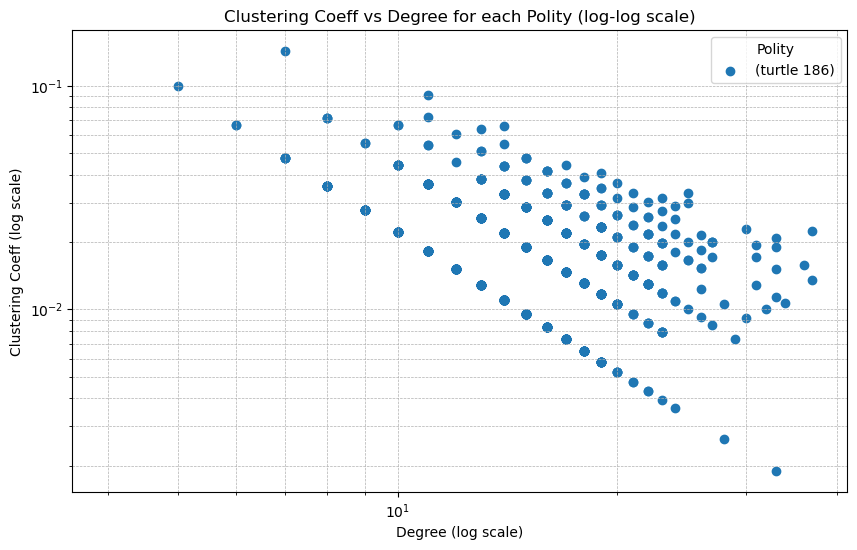

In [39]:
plt.figure(figsize=(10, 6))

for name, group in groups:
    plt.scatter(group["degree"], group["clustering-coeff"], label=name)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree (log scale)")
plt.ylabel("Clustering Coeff (log scale)")
plt.title("Clustering Coeff vs Degree for each Polity (log-log scale)")
plt.legend(title="Polity")
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

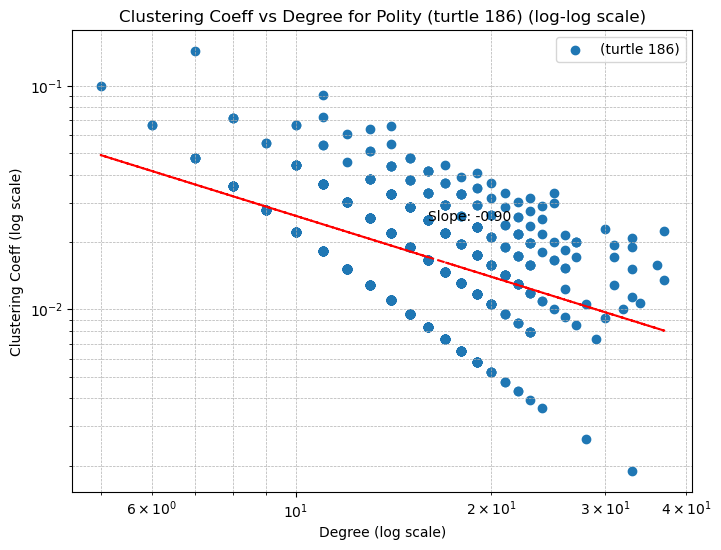

In [40]:
# Sort the data by "polity"
df_sorted = df.sort_values(by="polity")

# Group the data by "polity"
groups = df_sorted.groupby("polity")

# Perform linear regression and plot for each polity
for name, group in groups:
    # Filter out non-positive clustering coefficients
    group = group[group["clustering-coeff"] > 0]

    # Create a new plot for each polity
    plt.figure(figsize=(8, 6))

    # Plot data points
    plt.scatter(group["degree"], group["clustering-coeff"], label=name)

    # Perform linear regression on log-transformed data
    x = np.log(group["degree"].values.reshape(-1, 1))
    y = np.log(group["clustering-coeff"].values.reshape(-1, 1))

    model = LinearRegression()
    model.fit(x, y)

    # Get slope and intercept
    slope = model.coef_[0][0]
    intercept = model.intercept_[0]

    # Plot the regression line
    plt.plot(group["degree"], np.exp(model.predict(x)), color='red', linestyle='--')

    # Annotate the slope on the plot
    plt.text(group["degree"].iloc[0], group["clustering-coeff"].iloc[0], f"Slope: {slope:.2f}", fontsize=10)

    # Set plot properties
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Degree (log scale)")
    plt.ylabel("Clustering Coeff (log scale)")
    plt.title(f"Clustering Coeff vs Degree for Polity {name} (log-log scale)")
    plt.legend()
    plt.grid(True, which="both", ls="--", linewidth=0.5)

    # Show plot for the current polity
    plt.show()

In [41]:
# Check the distribution of clustering coefficient values
print(df["clustering-coeff"].describe())

# Count the number of non-positive values
non_positive_count = (df["clustering-coeff"] <= 0).sum()
print(f"Number of non-positive clustering coefficient values: {non_positive_count}")

count    1000.000000
mean        0.014648
std         0.014816
min         0.000000
25%         0.000000
50%         0.012821
75%         0.022059
max         0.142857
Name: clustering-coeff, dtype: float64
Number of non-positive clustering coefficient values: 302


## Loading Graph Data

In [42]:
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt

# Load the CSV file, considering the first row and column as headers
file_path = r'C:\\Users\\ameiy\\Documents\\3_Intern_Current\\IIST\\Experiments\\Turchin_Variation\\adjacency-matrix_innovation.csv'
data = pd.read_csv(file_path, header=None)

# Extract headers
headers = data.iloc[0, 1:].to_list()
data = data.iloc[1:, 1:]

# Ensure the data is 1000x1000
if data.shape[0] != 1000 or data.shape[1] != 1000:
    raise ValueError("The CSV file does not contain a 1000x1000 matrix.")

# Convert the DataFrame to a numpy matrix
matrix = data.to_numpy()
matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Check for correctness in data conversion (Graph-Matrix)

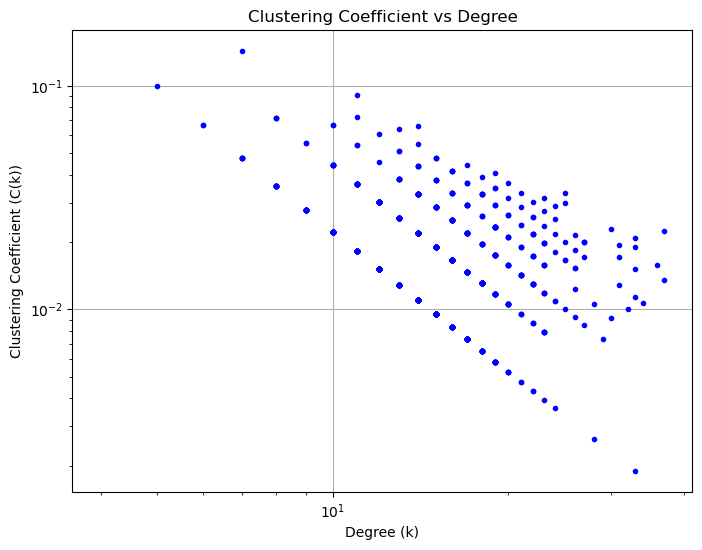

In [43]:
# Create a graph from the adjacency matrix with node labels
G = nx.from_numpy_array(matrix)
mapping = {i: headers[i] for i in range(len(headers))}
G = nx.relabel_nodes(G, mapping)

# Calculate degree of each node
degrees = dict(G.degree())

# Calculate clustering coefficient for each node
clustering_coefficients = nx.clustering(G)

# Prepare data for log-log plot
degree_sequence = [degrees[node] for node in G.nodes()]
clustering_sequence = [clustering_coefficients[node] for node in G.nodes()]

# Plot log-log plot
plt.figure(figsize=(8, 6))
plt.loglog(degree_sequence, clustering_sequence, 'bo', markersize=3)
plt.title('Clustering Coefficient vs Degree')
plt.xlabel('Degree (k)')
plt.ylabel('Clustering Coefficient (C(k))')
plt.grid(True)
plt.show()

In [44]:
degrees 

{311.0: 13,
 355.0: 15,
 432.0: 14,
 670.0: 15,
 944.0: 16,
 346.0: 17,
 780.0: 13,
 973.0: 16,
 642.0: 22,
 5.0: 16,
 322.0: 14,
 102.0: 10,
 161.0: 10,
 945.0: 15,
 912.0: 7,
 425.0: 17,
 657.0: 21,
 805.0: 5,
 139.0: 10,
 375.0: 10,
 656.0: 16,
 889.0: 17,
 216.0: 10,
 348.0: 16,
 259.0: 12,
 454.0: 14,
 46.0: 11,
 659.0: 13,
 341.0: 16,
 103.0: 14,
 10.0: 19,
 331.0: 10,
 99.0: 15,
 188.0: 8,
 332.0: 19,
 66.0: 8,
 823.0: 16,
 532.0: 13,
 444.0: 12,
 565.0: 7,
 926.0: 18,
 504.0: 8,
 592.0: 23,
 421.0: 15,
 722.0: 9,
 306.0: 13,
 792.0: 14,
 863.0: 26,
 125.0: 16,
 72.0: 12,
 377.0: 17,
 80.0: 8,
 168.0: 17,
 921.0: 15,
 488.0: 13,
 908.0: 12,
 164.0: 13,
 956.0: 20,
 221.0: 18,
 907.0: 9,
 109.0: 10,
 476.0: 15,
 809.0: 14,
 819.0: 6,
 245.0: 12,
 827.0: 10,
 449.0: 16,
 910.0: 12,
 961.0: 21,
 92.0: 12,
 796.0: 9,
 194.0: 16,
 241.0: 12,
 16.0: 16,
 200.0: 22,
 741.0: 9,
 433.0: 18,
 829.0: 8,
 694.0: 22,
 701.0: 15,
 342.0: 14,
 71.0: 14,
 811.0: 11,
 718.0: 13,
 82.0: 14,
 808.

In [45]:
matrix.shape

(1000, 1000)

In [46]:
G

### Visualisation

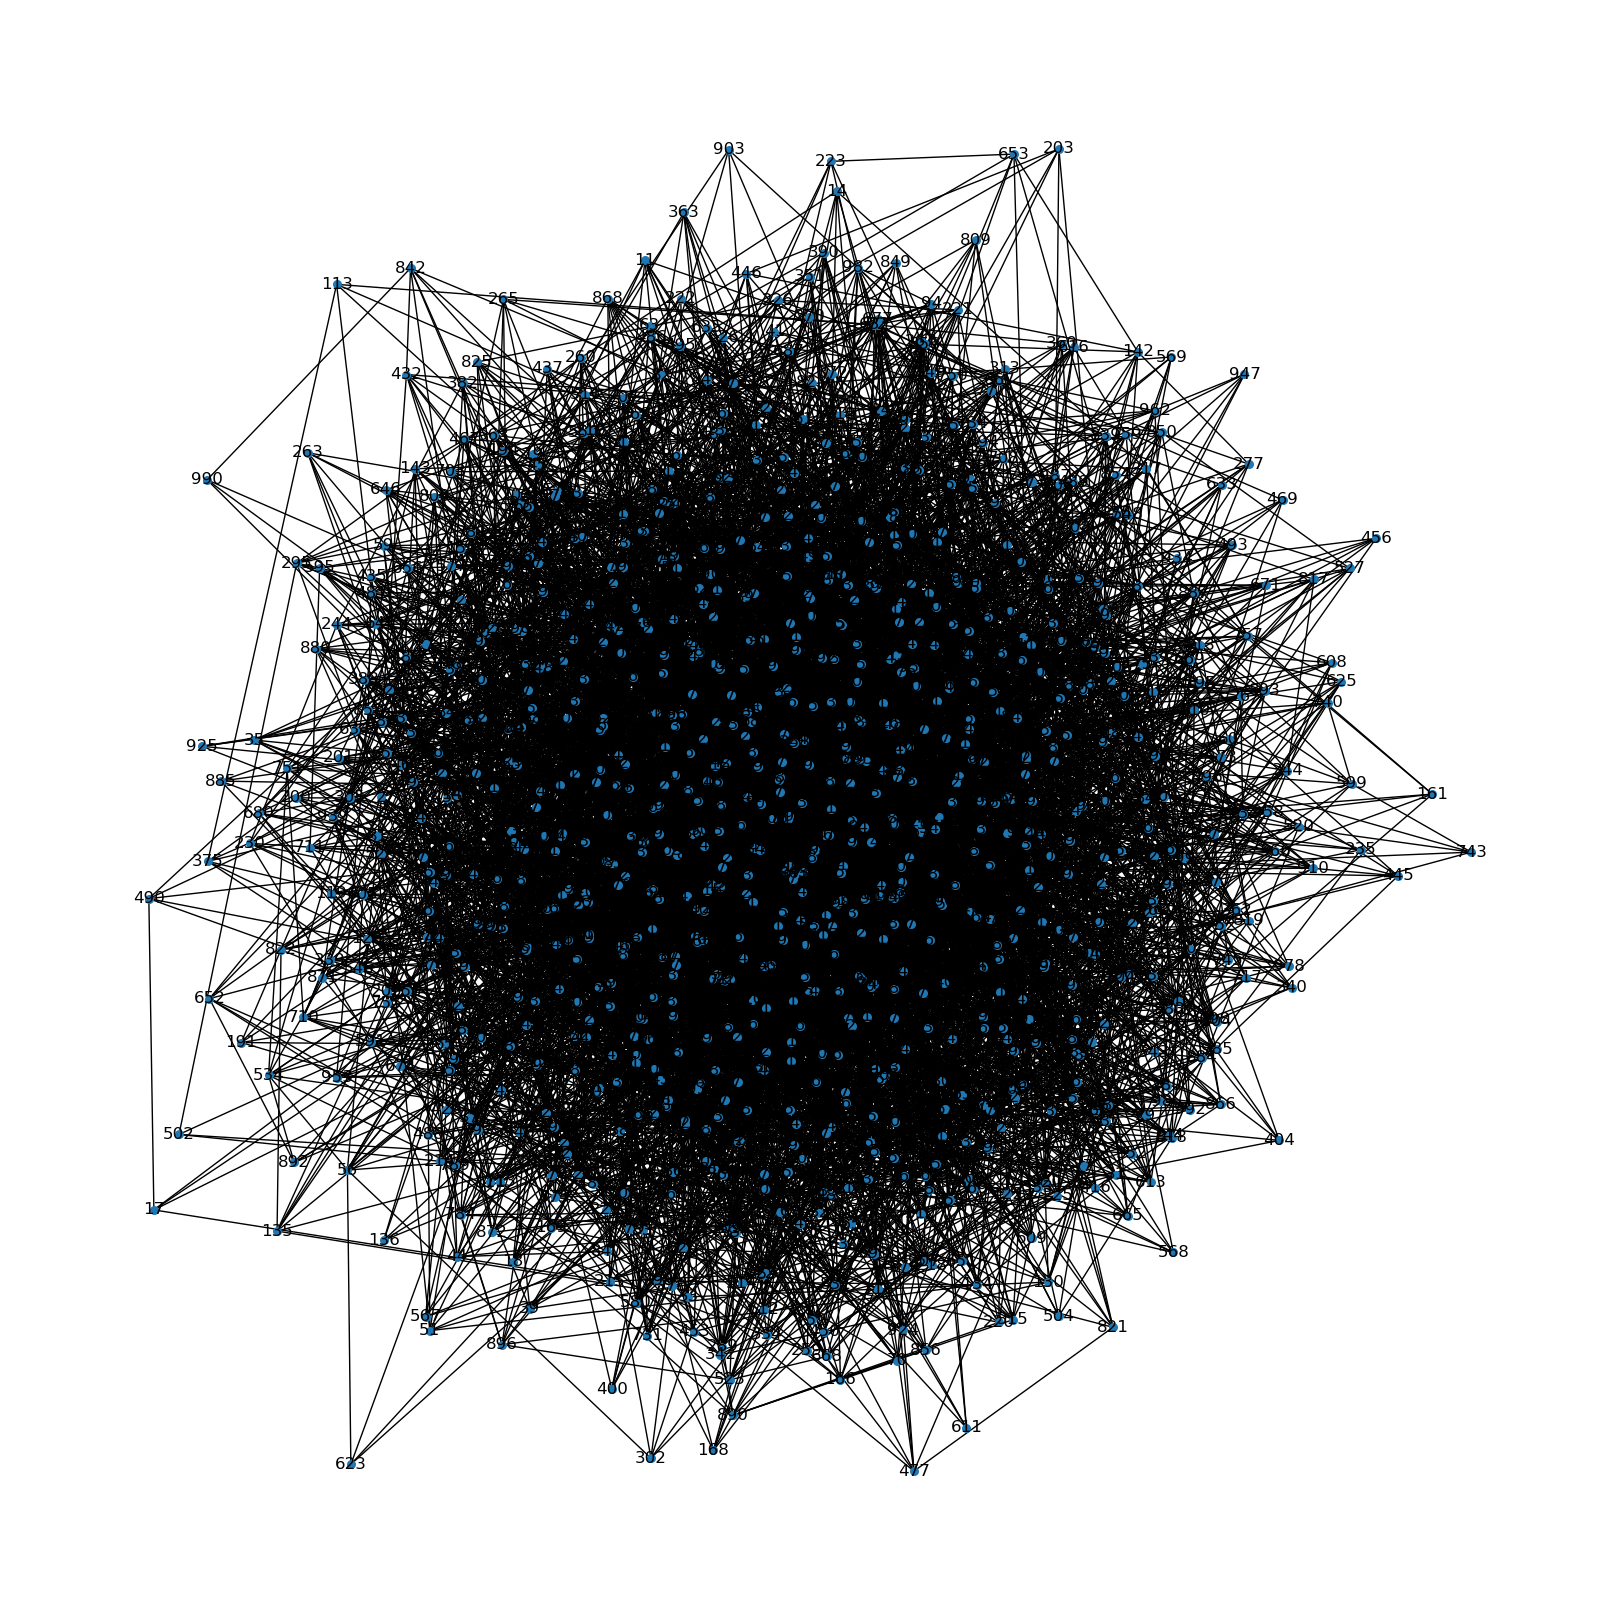

In [47]:
# Create a graph from the adjacency matrix
G = nx.from_numpy_array(matrix)

# Draw the graph
plt.figure(figsize=(16, 16))
nx.draw(G, node_size=30, with_labels=True)
plt.show()

## Graph Level Properties

- Algebraic Connectivity
- Natural Connectivity
- Trphic Coherence
- Assortativity Coefficient
- Modularity
- Variance of Node Betweeness
- Variance of Edge Betweeness
- Global Reaching Centrality
- Maximum Reaching Centrality

In [48]:
import numpy as np
import networkx as nx
from scipy.linalg import eigvals
from networkx.algorithms.assortativity import degree_assortativity_coefficient

# Algebraic Connectivity (AC)
def algebraic_connectivity(adjacency_matrix):
    N = adjacency_matrix.shape[0]
    degree_matrix = np.diag(np.sum(adjacency_matrix, axis=1))
    laplacian_matrix = degree_matrix - adjacency_matrix
    eigenvalues = np.sort(np.linalg.eigvals(laplacian_matrix))
    return eigenvalues[1].real  # The second smallest eigenvalue

# Natural Connectivity (NaC)
def natural_connectivity(adjacency_matrix):
    eigenvalues = eigvals(adjacency_matrix)
    exp_eigenvalues = np.exp(eigenvalues)
    nac = np.log(np.sum(exp_eigenvalues) / len(eigenvalues))
    return nac.real

# Trophic Coherence
def trophic_coherence(adjacency_matrix):
    N = adjacency_matrix.shape[0]
    degree_matrix = np.diag(np.sum(adjacency_matrix, axis=1))
    laplacian_matrix = degree_matrix - adjacency_matrix
    eigenvalues = np.linalg.eigvals(laplacian_matrix)
    trophic_coherence = np.sum(eigenvalues**2) / N
    return trophic_coherence.real

# Assortativity Coefficient
def assortativity_coefficient(adjacency_matrix):
    G = nx.from_numpy_array(adjacency_matrix)
    return degree_assortativity_coefficient(G)

# Modularity
def modularity(adjacency_matrix):
    G = nx.from_numpy_array(adjacency_matrix)
    partition = list(nx.algorithms.community.greedy_modularity_communities(G))
    modularity_value = nx.algorithms.community.modularity(G, partition)
    return modularity_value

# Variance of Node Betweenness
def variance_node_betweenness(adjacency_matrix):
    G = nx.from_numpy_array(adjacency_matrix)
    node_betweenness = nx.betweenness_centrality(G).values()
    return np.var(list(node_betweenness))

# Variance of Link Betweenness
def variance_link_betweenness(adjacency_matrix):
    G = nx.from_numpy_array(adjacency_matrix)
    link_betweenness = nx.edge_betweenness_centrality(G).values()
    return np.var(list(link_betweenness))

# Global Reaching Centrality
def global_reaching_centrality(adjacency_matrix):
    G = nx.from_numpy_array(adjacency_matrix)
    local_reaching_centralities = []
    for node in G.nodes():
        reachable_nodes = nx.single_source_shortest_path_length(G, node)
        local_reaching_centrality = sum(reachable_nodes.values()) / ((len(G) - 1) * (len(G) - 1))
        local_reaching_centralities.append(local_reaching_centrality)
    max_local_reaching_centrality = max(local_reaching_centralities)
    return sum(max_local_reaching_centrality - r for r in local_reaching_centralities) / (len(G) - 1)


# Maximum Betweenness Centrality
def maximum_betweenness_centrality(adjacency_matrix):
    G = nx.from_numpy_array(adjacency_matrix)
    node_betweenness = nx.betweenness_centrality(G)
    return max(node_betweenness.values())

# usage
adjacency_matrix = matrix

# Calculate the metrics
ac = algebraic_connectivity(adjacency_matrix)
nac = natural_connectivity(adjacency_matrix)
tc = trophic_coherence(adjacency_matrix)
ac_coeff = assortativity_coefficient(adjacency_matrix)
mod = modularity(adjacency_matrix)
var_node_betweenness = variance_node_betweenness(adjacency_matrix)
var_link_betweenness = variance_link_betweenness(adjacency_matrix)
grc = global_reaching_centrality(adjacency_matrix)
max_bc = maximum_betweenness_centrality(adjacency_matrix)

print(f"Algebraic Connectivity (AC): {ac}")
print(f"Natural Connectivity (NaC): {nac}")
print(f"Trophic Coherence: {tc}")
print(f"Assortativity Coefficient: {ac_coeff}")
print(f"Modularity: {mod}")
print(f"Variance of Node Betweenness: {var_node_betweenness}")
print(f"Variance of Link Betweenness: {var_link_betweenness}")
print(f"Global Reaching Centrality: {grc}")
print(f"Maximum Betweenness Centrality: {max_bc}")


Algebraic Connectivity (AC): 3.476859537088858
Natural Connectivity (NaC): 9.594738163193734
Trophic Coherence: 253.1660000000008
Assortativity Coefficient: 0.021029194279678906
Modularity: 0.22011792744823455
Variance of Node Betweenness: 1.805478451870929e-06
Variance of Link Betweenness: 6.130019691220613e-09
Global Reaching Centrality: 0.0005361006943169681
Maximum Betweenness Centrality: 0.010313266711792692


## Node Level Properties

- Betweeness Centrality
- Closeness Centrality
- Degree Centrality
- EigenVector Centrality
- Local Reaching Centrality
- Trophic Level of Vertices

In [49]:
# Node-wise properties

# Local Reaching Centrality
def local_reaching_centrality(adjacency_matrix, node):
    G = nx.from_numpy_array(adjacency_matrix)
    reachable_nodes = nx.single_source_shortest_path_length(G, node)
    local_reaching_centrality = sum(reachable_nodes.values()) / ((len(G) - 1) * (len(G) - 1))
    return local_reaching_centrality

def node_properties(adjacency_matrix):
    G = nx.from_numpy_array(adjacency_matrix)
    properties = {}
    
    # Betweenness Centrality
    betweenness_centrality = nx.betweenness_centrality(G)
    
    # Closeness Centrality
    closeness_centrality = nx.closeness_centrality(G)
    
    # Degree Centrality
    degree_centrality = nx.degree_centrality(G)
    
    # Eigenvector Centrality
    eigenvector_centrality = nx.eigenvector_centrality_numpy(G)
    
    # Local Reaching Centrality
    local_reaching_centralities = {node: local_reaching_centrality(adjacency_matrix, node) for node in G.nodes()}
    
    for node in G.nodes():
        properties[node] = {
            'Betweenness Centrality': betweenness_centrality[node],
            'Closeness Centrality': closeness_centrality[node],
            'Degree Centrality': degree_centrality[node],
            'Eigenvector Centrality': eigenvector_centrality[node],
            'Local Reaching Centrality': local_reaching_centralities[node]
        }
    
    return properties

# Trophic Levels
def trophic_levels(adjacency_matrix):
    G = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)
    S = np.zeros(G.number_of_nodes())
    for node in G.nodes():
        predecessors = list(G.predecessors(node))
        if predecessors:
            S[node] = 1 + np.mean([S[pred] for pred in predecessors])
    return S

node_props = node_properties(adjacency_matrix)
trophic_levels = trophic_levels(adjacency_matrix)

print("\nNode-wise properties:")
for node, props in node_props.items():
    print(f"Node {node}:")
    for prop, value in props.items():
        print(f"  {prop}: {value}")

print("\nTrophic Levels of Vertices:")
for node, level in enumerate(trophic_levels):
    print(f"Node {node}: Trophic Level: {level}")


Node-wise properties:
Node 0:
  Betweenness Centrality: 0.0011913199763817508
  Closeness Centrality: 0.34177215189873417
  Degree Centrality: 0.013013013013013013
  Eigenvector Centrality: 0.021301638073773582
  Local Reaching Centrality: 0.0029288547807066324
Node 1:
  Betweenness Centrality: 0.0017098305812755848
  Closeness Centrality: 0.36
  Degree Centrality: 0.015015015015015015
  Eigenvector Centrality: 0.033853928676721365
  Local Reaching Centrality: 0.0027805583361138917
Node 2:
  Betweenness Centrality: 0.0014971159803893082
  Closeness Centrality: 0.3490566037735849
  Degree Centrality: 0.014014014014014014
  Eigenvector Centrality: 0.023820855927155455
  Local Reaching Centrality: 0.002867732597462327
Node 3:
  Betweenness Centrality: 0.0017406433732949681
  Closeness Centrality: 0.3583213773314204
  Degree Centrality: 0.015015015015015015
  Eigenvector Centrality: 0.031101297972984603
  Local Reaching Centrality: 0.002793584375165957
Node 4:
  Betweenness Centrality: 0.

In [50]:
# Create DataFrame
measure_data = []
for node, props in node_props.items():
    props['Node'] = node
    props['Label'] = mapping[node]
    props['Trophic Level'] = trophic_levels[node]
    measure_data.append(props)

measures_df = pd.DataFrame(measure_data)
measures_df = measures_df[['Node', 'Label', 'Betweenness Centrality', 'Closeness Centrality', 'Degree Centrality', 'Eigenvector Centrality', 'Local Reaching Centrality', 'Trophic Level']]

# Display DataFrame
print("\nNode-wise properties and Trophic Levels in DataFrame:")
print(measures_df)


Node-wise properties and Trophic Levels in DataFrame:
     Node  Label  Betweenness Centrality  Closeness Centrality  \
0       0  311.0                0.001191              0.341772   
1       1  355.0                0.001710              0.360000   
2       2  432.0                0.001497              0.349057   
3       3  670.0                0.001741              0.358321   
4       4  944.0                0.001879              0.354759   
..    ...    ...                     ...                   ...   
995   995  467.0                0.000915              0.340723   
996   996  551.0                0.002232              0.365132   
997   997   41.0                0.001707              0.351142   
998   998  994.0                0.000992              0.349057   
999   999  144.0                0.003203              0.370549   

     Degree Centrality  Eigenvector Centrality  Local Reaching Centrality  \
0             0.013013                0.021302                   0.002929  

## Miscellaneous Properties
- Dominating Set
- Maximal Independent Set
- Non-Randomness of Graph vs Non-Randomness of ER graph
- Check for Tree or Forest structure
- Rich Club Coefficient and Set

In [51]:
import networkx as nx

x = nx.dominating_set(G, start_with=None)
print("Dominating Set: ", x, "\n", "Size of set: ", len(x))

y = nx.maximal_independent_set(G, nodes=None, seed=None)
print("Maximal Independent Set: ", y, "\n", "Size of set: ", len(y))

z = nx.non_randomness(G)
print("Non-Randomness of Hierarchy Graph: ",z, "\n", "Number of Edges in graph: ",
G.number_of_edges())

# Create a graph (e.g., a random graph)
G_er = nx.erdos_renyi_graph(1000, 0.05)
# Calculate non-randomness
w = nx.non_randomness(G_er)
print("Non-Randomness of ER Graph: ",w, "\n", "Number of Edges in ER graph: ",
G_er.number_of_edges())


print("Is Tree or Forest: ", nx.is_tree(G), nx.is_forest(G))


rc = nx.rich_club_coefficient(G, normalized=False, seed=41)
print("Rich Club Set: ", rc, "\n", "Size of set: ", len(rc))



Dominating Set:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 520, 521, 16, 17, 522, 19, 532, 21, 533, 23, 24, 25, 534, 27, 28, 29, 30, 31, 32, 33, 34, 35, 543, 547, 38, 39, 41, 44, 45, 47, 48, 49, 50, 559, 52, 54, 55, 57, 569, 59, 60, 61, 63, 64, 65, 575, 578, 70, 71, 72, 73, 75, 82, 83, 84, 89, 91, 94, 607, 96, 609, 98, 99, 107, 111, 623, 624, 114, 115, 119, 122, 124, 125, 636, 639, 128, 136, 137, 651, 141, 147, 661, 151, 153, 155, 156, 669, 159, 160, 161, 671, 164, 165, 678, 169, 172, 175, 180, 187, 700, 703, 194, 195, 708, 205, 209, 210, 214, 218, 219, 223, 226, 228, 740, 231, 743, 744, 745, 236, 237, 239, 759, 760, 762, 258, 260, 263, 266, 268, 780, 273, 785, 282, 285, 290, 291, 294, 302, 821, 310, 317, 831, 320, 832, 324, 335, 337, 864, 867, 872, 362, 366, 372, 373, 890, 381, 383, 384, 896, 899, 388, 394, 907, 400, 407, 408, 416, 931, 932, 421, 423, 426, 940, 429, 435, 437, 952, 441, 953, 967, 970, 973, 976, 469, 990, 488, 494, 504, 511} 
 Size of set:  203
Maximal Independent 

In [52]:
# G_max_branch = nx.maximum_branching(G)
# # Draw the graph
# plt.figure(figsize=(6,6))
# nx.draw(G_max_branch, node_size=30, with_labels=True)
# plt.show()

- Hierarchical Levels of Nodes
- Democracy Coefficient (Graph Level)
- Influence Centrality (Node level)
- Hierarchical Incoherence (Graph Level)

In [53]:
import networkx as nx
import numpy as np
from scipy.linalg import lstsq

# Function to compute the hierarchical levels
def hierarchical_levels(G):
    A = nx.adjacency_matrix(G).todense()
    L = np.diag(np.sum(A, axis=1)) - A  # In-degree Laplacian
    M = L.T
    d = np.sum(A, axis=1)
    
    # Solve Mx = d using least squares
    g, _, _, _ = lstsq(M, d)
    return g

# Function to compute the democracy coefficient
def democracy_coefficient(G):
    A = nx.adjacency_matrix(G).todense()
    L = np.diag(np.sum(A, axis=1)) - A  # In-degree Laplacian
    M = L.T
    d = np.sum(A, axis=1)
    
    g = hierarchical_levels(G)
    
    # Democracy coefficient calculation
    dc_forward = np.std(g) / np.mean(g)
    return dc_forward

# Function to compute the influence centrality
def influence_centrality(G):
    g = hierarchical_levels(G)
    centrality = {node: level for node, level in zip(G.nodes(), g)}
    return centrality

# Function to compute hierarchical incoherence
def hierarchical_incoherence(G):
    g = hierarchical_levels(G)
    incoherence = np.var(g)
    return incoherence

# Example graph
G = nx.from_numpy_array(adjacency_matrix)

values_hierarchical_levels = hierarchical_levels(G)
values_democracy_coefficient = democracy_coefficient(G)
values_influence_centrality = influence_centrality(G)
values_hierarchical_incoherence = hierarchical_incoherence(G)
# Calculate metrics
print("Hierarchical Levels:", values_hierarchical_levels)
print("Democracy Coefficient:", values_democracy_coefficient)
print("Influence Centrality:", values_influence_centrality)
print("Hierarchical Incoherence:", values_hierarchical_incoherence)


Hierarchical Levels: [-1.28837267e-01  3.14083354e-01 -3.17408011e-03  2.48076448e-01
  1.77149094e-01  4.66734243e-01  3.49903565e-02  3.10954134e-01
  6.05833076e-01  3.03328946e-01  5.83526963e-02 -3.14166057e-01
 -4.00127242e-01  1.65184514e-01 -9.21470231e-01  4.17876956e-01
  4.66007651e-01 -2.39824421e+00 -1.23090866e-01 -3.23746118e-01
  2.25759475e-01  2.98337954e-01 -5.09668759e-01  2.11682880e-01
 -1.93970009e-01 -1.45266419e-01 -1.03216378e-01  4.44273355e-02
  1.77590305e-01  4.36602900e-02  4.14635059e-01 -2.53273027e-01
 -6.26994760e-03 -8.79743440e-01  2.78426440e-01 -8.51774294e-01
  3.14120219e-01  1.30748896e-01 -8.04467801e-02 -1.04369109e+00
  3.91465177e-01 -1.07903547e+00  5.54974818e-01  1.95922946e-01
 -6.74227820e-01 -8.79430980e-02  2.18350582e-01  4.54870416e-01
  2.95150950e-01 -1.56042910e-01  2.79161151e-01 -9.87039857e-01
  2.92463133e-01  1.41347648e-02  1.06674427e-01 -4.81799087e-01
 -2.77793265e-01  3.92723879e-01  1.05195144e-01 -2.71840512e-01
 -4.

In [54]:
import networkx as nx
import numpy as np
import pandas as pd

# Function to compute the k-shell decomposition
def k_shell_decomposition(G):
    return nx.core_number(G)

# Function to compute the democracy coefficient
def democracy_coefficient(k_shell_indices):
    values = np.array(list(k_shell_indices.values()))
    dc = np.std(values) / np.mean(values)
    return dc

# Function to compute the influence centrality
def influence_centrality(k_shell_indices):
    return k_shell_indices

# Function to compute hierarchical incoherence
def hierarchical_incoherence(k_shell_indices):
    values = np.array(list(k_shell_indices.values()))
    incoherence = np.var(values)
    return incoherence

# Example graph
adjacency_matrix = matrix
G = nx.from_numpy_array(adjacency_matrix)

# Calculate k-shell decomposition
k_shell_indices = k_shell_decomposition(G)

# Calculate metrics based on k-shell indices
values_democracy_coefficient = democracy_coefficient(k_shell_indices)
values_influence_centrality = influence_centrality(k_shell_indices)
values_hierarchical_incoherence = hierarchical_incoherence(k_shell_indices)

print("K-shell Decomposition:", k_shell_indices)
print("Democracy Coefficient:", values_democracy_coefficient)
print("Influence Centrality:", values_influence_centrality)
print("Hierarchical Incoherence:", values_hierarchical_incoherence)

# Create DataFrame
data = []
for node, k_shell_index in k_shell_indices.items():
    data.append({
        'Node': node,
        'K-shell Index': k_shell_index,
        'Influence Centrality': k_shell_index
    })

df = pd.DataFrame(data)
df = df[['Node', 'K-shell Index', 'Influence Centrality']]
df['Label'] = df['Node'].map(mapping)

# Display DataFrame
print("\nNode-wise properties in DataFrame:")
(df)


K-shell Decomposition: {0: 9, 1: 9, 2: 9, 3: 9, 4: 9, 5: 9, 6: 9, 7: 9, 8: 9, 9: 9, 10: 9, 11: 9, 12: 9, 13: 9, 14: 7, 15: 9, 16: 9, 17: 5, 18: 9, 19: 9, 20: 9, 21: 9, 22: 9, 23: 9, 24: 9, 25: 9, 26: 9, 27: 9, 28: 9, 29: 9, 30: 9, 31: 9, 32: 9, 33: 8, 34: 9, 35: 8, 36: 9, 37: 9, 38: 9, 39: 7, 40: 9, 41: 7, 42: 9, 43: 9, 44: 8, 45: 9, 46: 9, 47: 9, 48: 9, 49: 9, 50: 9, 51: 8, 52: 9, 53: 9, 54: 9, 55: 9, 56: 9, 57: 9, 58: 9, 59: 9, 60: 9, 61: 9, 62: 9, 63: 6, 64: 9, 65: 9, 66: 9, 67: 9, 68: 9, 69: 9, 70: 9, 71: 9, 72: 9, 73: 9, 74: 9, 75: 8, 76: 9, 77: 7, 78: 9, 79: 9, 80: 9, 81: 9, 82: 9, 83: 9, 84: 9, 85: 9, 86: 9, 87: 9, 88: 9, 89: 9, 90: 9, 91: 9, 92: 9, 93: 9, 94: 9, 95: 9, 96: 9, 97: 9, 98: 8, 99: 9, 100: 9, 101: 9, 102: 9, 103: 9, 104: 9, 105: 9, 106: 9, 107: 9, 108: 9, 109: 9, 110: 9, 111: 9, 112: 9, 113: 5, 114: 9, 115: 9, 116: 9, 117: 9, 118: 9, 119: 8, 120: 9, 121: 9, 122: 9, 123: 9, 124: 9, 125: 9, 126: 9, 127: 9, 128: 9, 129: 9, 130: 9, 131: 9, 132: 9, 133: 9, 134: 9, 135: 8

,Node,K-shell Index,Influence Centrality,Label
0,0,9,9,311.0
1,1,9,9,355.0
2,2,9,9,432.0
3,3,9,9,670.0
4,4,9,9,944.0
...,...,...,...,...
995,995,9,9,467.0
996,996,9,9,551.0
997,997,9,9,41.0
998,998,9,9,994.0


In [55]:
print(len(values_influence_centrality) , len(values_hierarchical_levels))

1000 1000


In [56]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [57]:
label_of_node_0 = G.nodes[0].get('label', None)
print(label_of_node_0)

None


In [58]:
G[0]

AtlasView({53: {'weight': 1}, 110: {'weight': 1}, 132: {'weight': 1}, 245: {'weight': 1}, 306: {'weight': 1}, 313: {'weight': 1}, 315: {'weight': 1}, 509: {'weight': 1}, 668: {'weight': 1}, 698: {'weight': 1}, 766: {'weight': 1}, 859: {'weight': 1}, 900: {'weight': 1}})

In [59]:
mapping[0]

311.0